In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint

In [49]:
save_flag = False

In [50]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.tk5'
dtype = 'float32'
gl5shape = (2160, 4320)

# tokyo region
# "138 141 34 38"
one = 138
two = 141
three = 34
four = 38
upperindex = (90-four)*12
lowerindex = (90-three)*12
leftindex = (180+one)*12
rightindex = (180+two)*12
print(upperindex, lowerindex, leftindex, rightindex)

624 672 3816 3852


In [51]:
lndara_load = f"{h08dir}/map/dat/lnd_ara_/lndara.CAMA{SUF}"
lndara_save = f"{h08dir}/map/dat/lnd_ara_/lndara.CAMA{tag}"

In [52]:
if save_flag is True:
    data = np.fromfile(lndara_load, dtype=dtype).reshape(gl5shape)
    tokyo = data[upperindex:lowerindex, leftindex:rightindex]
    tokyo.astype(np.float32).tofile(lndara_save)

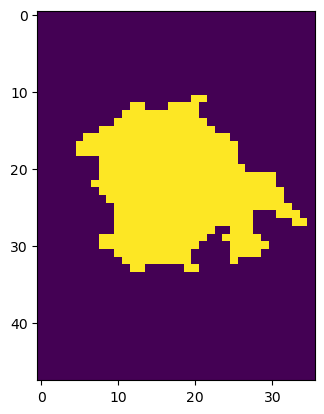

In [53]:
maskpath = h08dir + '/map/dat/lnd_msk_/lndmsk.CAMA.tk5'
lndmsk = np.fromfile(maskpath, dtype=dtype).reshape(48, 36)
plt.imshow(lndmsk)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


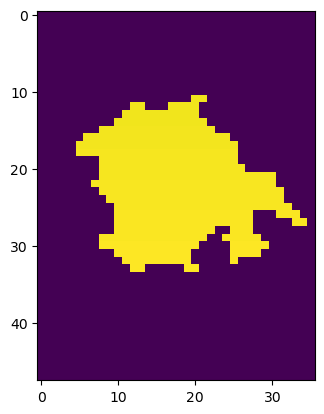

In [57]:
arapath = h08dir + '/map/dat/lnd_ara_/lndara.CAMA.tk5'
lndara = np.fromfile(arapath, dtype=dtype).reshape(48, 36)
plt.imshow(lndara)
print(lndara[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


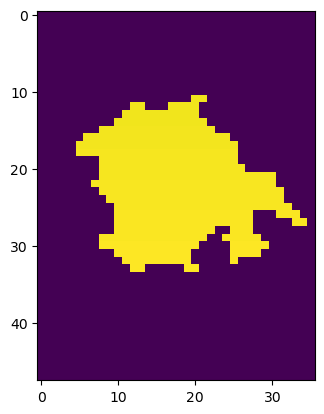

In [55]:
tmp = np.where(lndmsk==1, lndara, 0)
print(tmp[0])
plt.imshow(tmp)

In [56]:
# save the file
# to overwrite the file please change flag to True
if save_flag is True:
    tmp.astype(np.float32).tofile(f"{h08dir}/map/dat/lnd_ara_/lndara.CAMA.tk5")